## Lab 2: Clustering ##
INFO 254

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [9]:
df = pd.read_csv('yelp_reviewers.csv')
print(df.shape)
df.dropna().describe()

(171639, 43)


q3            q4            q5            q6            q7  \
count  24205.000000  24205.000000  24205.000000  24205.000000  24205.000000   
mean       6.673497      5.532121      4.990002      9.002644      1.507177   
std        7.468561     25.407165     22.812399     28.164931      0.889274   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%        2.000000      1.000000      1.000000      2.000000      0.690000   
50%        5.000000      2.000000      2.000000      5.000000      1.610000   
75%        8.000000      4.000000      4.000000      9.000000      2.080000   
max      360.000000   2333.000000   2093.000000   2420.000000      5.890000   

                 q8            q9           q10           q11           q12  \
count  24205.000000  24205.000000  24205.000000  24205.000000  24205.000000   
mean       0.930915      0.863740      1.540158     26.765398     25.708965   
std        0.980001      0.951531      1.027086     10.166944     11.569436   
min        0.000000      0.000000      0.000000      2.780000      1.410000   
25%        0.000000      0.000000      0.690000     20.000000     16.670000   
50%        0.690000      0.690000      1.610000     25.930000     25.000000   
75%        1.390000      1.390000      2.200000     33.330000     33.330000   
max        7.750000      7.650000      7.790000     84.620000     89.290000   

           ...               q16r          q16u          q16v          q16w  \
count      ...       24205.000000  24205.000000  24205.000000  24205.000000   
mean       ...           3.633588      0.460916     22.550671     25.064697   
std        ...           1.490942      0.509305     14.454279     28.650883   
min        ...           1.000000      0.000000      1.000000      1.000000   
25%        ...           3.000000      0.000000     10.000000      9.000000   
50%        ...           4.000000      0.333333     21.000000     17.000000   
75%        ...           5.000000      0.666667     34.000000     32.000000   
max        ...           5.000000      7.000000     53.000000   1289.000000   

               q16x          q16y          q16z         q16aa         q16ab  \
count  24205.000000  24205.000000  24205.000000  24205.000000  24205.000000   
mean       0.003781     73.981978      0.642677      0.561124      1.141080   
std        0.006020     51.060694      1.427017      1.908011      3.234828   
min        0.000000      0.250000      0.000000      0.000000      0.000000   
25%        0.000477     39.125000      0.000000      0.000000      0.000000   
50%        0.001944     61.842593      0.000000      0.000000      0.500000   
75%        0.004666     95.375000      1.000000      0.000000      1.333333   
max        0.150618    549.333333     44.000000    106.000000    342.300000   

              q16ac  
count  24205.000000  
mean       3.649456  
std        0.990191  
min        1.000000  
25%        3.200000  
50%        3.800000  
75%        4.333333  
max        5.000000  

[8 rows x 40 columns]

### Question 1 ###

Choose an implementation of k-means and specify it in the google sheet  

** Answer **:  


In [10]:
#We are chosing scikit-learn:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### Question 2 ###
What is the best choice of k according to the silhouette metric for clustering q4-q6 (# of cool, funny, useful votes). Only consider 2 <= k <= 8.  

NOTE: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder. This can be accomplished in MATLAB, for example, with the command:  [IDX,C]=kmeans(d,4, 'Distance', 'sqeuclidean','EmptyAction','singleton')

**Answer**:  

In [4]:
# Use only random 5% of data
x = train_test_split(np.array(df[['q4','q5','q6']]), test_size=0.05)[1]
len(x)

8582

In [5]:
results = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x)
    score = silhouette_score(x, kmeans.labels_)
    results.append((i, score))

results = pd.DataFrame(results).set_index(0)[1]
print ('The maximum score is ',results.max(),' at ',results.idxmax(),' clusters.')

The maximum score is  0.9927977086138658  at  2  clusters.


***

### Question 3 ###
Answer question 2 but using the log of the features (q7-q10)

**Answer**:  

In [6]:
# Use only random 30% of useful (without -inf) log data
x = df[['q7','q8','q9', 'q10']].replace(0, np.NaN).apply(np.log)
x = x.dropna(how='any')
x = train_test_split(np.array(x), test_size=0.7)[1]
len(x)

10322

In [7]:
results = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x)
    score = silhouette_score(x, kmeans.labels_)
    results.append((i, score))

results = pd.DataFrame(results).set_index(0)[1]
print ('The maximum score is ',results.max(),' at ',results.idxmax(),' clusters.')

The maximum score is  0.36883657362532474  at  2  clusters.


***

### Question 4 ###
Answer question 2 but using the percentage of the features (q11-q13)

**Answer**:

In [8]:
# Use only random 5% of data
x = df[['q11','q12','q13']]
x = x.dropna(how='any')
x = train_test_split(np.array(x), test_size=0.1)[1]
len(x)

10036

In [9]:
results = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x)
    score = silhouette_score(x, kmeans.labels_)
    results.append((i, score))

results = pd.DataFrame(results).set_index(0)[1]
print ('The maximum score is ',results.max(),' at ',results.idxmax(),' clusters.')
best_k = results.idxmax()

The maximum score is  0.6591056868034987  at  8  clusters.


***

### Question 5 ###
Inspect the [best] clustering generated from question 4

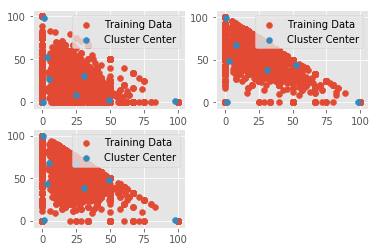

In [10]:
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(x)
plt.subplot(221)
plt.scatter(x[:,0],x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.legend(['Training Data','Cluster Center'])
plt.subplot(222)
plt.scatter(x[:,1],x[:,2])
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2])
plt.legend(['Training Data','Cluster Center'])
plt.subplot(223)
plt.scatter(x[:,0],x[:,2])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2])
plt.legend(['Training Data','Cluster Center'])
plt.show()

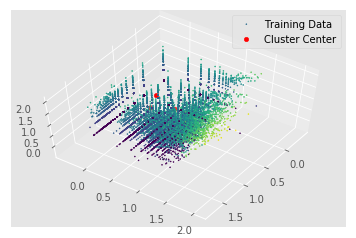

In [73]:
from mpl_toolkits import mplot3d
#plt.scatter(x[:,0],x[:,1],x[:,2])
ax = plt.axes(projection='3d')
ax.scatter3D(x.iloc[:,0],x.iloc[:,1],x.iloc[:,2], s=1, c=x.iloc[:,2],cmap='viridis', depthshade=False)
ax.scatter3D(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], s=20, c='red', cmap='hot')
plt.legend(['Training Data','Cluster Center'])
ax.view_init(60, 35)

#### 5.a ####
**Question**: List the number of data points in each cluster (eg. C1: 2,000 C2: 4,200 etc)

In [12]:
count = np.unique(kmeans.labels_, return_counts=True)
count = pd.Series(count[1],index=count[0])
count

0     406
1    3383
2     667
3     549
4     988
5    1888
6     684
7    1471
dtype: int64

#### 5.b ####
**Question**: Were there clusters that represented very funny but useless reviewers?  

**Answer**:  

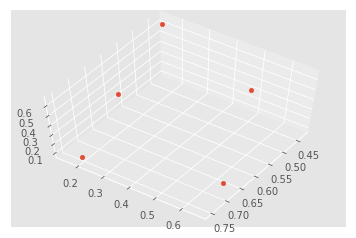

In [77]:
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2])
ax = plt.axes(projection='3d')
ax.scatter3D(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], s=20 , cmap='hot', depthshade=False)
ax.view_init(60, 35)

#### 5.c ####
**Question**: How many reviewers were in the cluster that represented relatively equal strength in all voting categories (assuming such a cluster exists in your clustering)?  

**Answer**:

In [14]:
var_cluster = []
for i in range(0,8):
    var_cluster.append((i, kmeans.cluster_centers_[i].std()))

var_cluster = pd.DataFrame(var_cluster).set_index(0)[1]
print ('The minimum standard deviation is ',var_cluster.min(),' at the No. ',var_cluster.idxmin(),' cluster. Center of the cluster is at:', kmeans.cluster_centers_[var_cluster.idxmin()])


The minimum standard deviation is  3.5030422144394073  at the No.  5  cluster. Center of the cluster is at: [30.99385064 30.71948093 38.28394068]


***

### Question 6 ###
Cluster the dataset using $k = 5$ and using features q7-q13 (log and % type votes) and q14 (most active year feature) and the natural log of q15 (avg review chars)

In [181]:
# Use only random 5% of data
# Use only random 5% of data
x = df[['q7','q8','q9', 'q10','q15']].replace(0, np.NaN).apply(np.log)
x = x.join(df[['q11','q12','q13','q14']])
x = x.dropna(how='any')

kmeans = KMeans(n_clusters=5, random_state=0).fit(x)

#### 6.a ####
**Question**: What is the silhouette metric for this clustering?   
You may use the max, as you did in question 2. For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [182]:
silhouette_score(x, kmeans.labels_)

0.3278218759520741

#### 6.b ####
**Question**: What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters (eg. C1: 1.4 C2: 4.2 C3: 3.4 etc)

In [183]:
x = df[['q7','q8','q9', 'q10','q15']].replace(0, np.NaN).apply(np.log)
x = x.join(df[['q11','q12','q13','q14', 'q3']])
x = x.dropna(how='any')
x['labels'] = kmeans.labels_.tolist()
x.groupby('labels')['q3'].mean()

labels
0    11.243235
1     9.381624
2     7.007895
3     7.797412
4    11.924764
Name: q3, dtype: float64

***

### Question 7 ###
Cluster the dataset using the features described in question 6 + every group’s question 16 features (you may drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [204]:
x = df[['q7','q8','q9', 'q10','q15']].replace(0, np.NaN).apply(np.log)
x = x.join(df.loc[:,'q16a':'q16ac'])
x = x.join(df.loc[:,'q11':'q14'])

x.isnull().sum()

q7        71142
q8       145060
q9       147113
q10      114927
q15           0
q16a          0
q16b          0
q16c          0
q16d          0
q16e          0
q16f          0
q16g          0
q16h          0
q16i          0
q16j          0
q16k          0
q16l          0
q16m          0
q16n          0
q16o          0
q16p          0
q16q          0
q16r          0
q16s          0
q16t          0
q16u          0
q16v          0
q16w          0
q16x          0
q16y          0
q16z          0
q16aa         0
q16ab     47594
q16ac         0
q11       71282
q12       71282
q13       71282
q14           0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columnsbefore removing any columns

In [205]:
x_red = x.drop(['q8','q9','q10'], axis=1)
x_red.isnull().sum()

q7       71142
q15          0
q16a         0
q16b         0
q16c         0
q16d         0
q16e         0
q16f         0
q16g         0
q16h         0
q16i         0
q16j         0
q16k         0
q16l         0
q16m         0
q16n         0
q16o         0
q16p         0
q16q         0
q16r         0
q16s         0
q16t         0
q16u         0
q16v         0
q16w         0
q16x         0
q16y         0
q16z         0
q16aa        0
q16ab    47594
q16ac        0
q11      71282
q12      71282
q13      71282
q14          0
dtype: int64

By removing 2 features, we double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [207]:
x_dummies = pd.get_dummies(x_red[['q16s','q16t']])
x_pro = x_red.drop(['q16s','q16t'], axis=1)
x_pro = x_pro.join(x_dummies)
x_pro = x_pro.dropna(how='any')
x_pro.head()

q7       q15  q16a      q16b      q16c      q16d      q16e      q16f  \
1  0.095310  5.030438     0  0.577350  0.002179  4.666667  0.028322  0.471405   
3  0.095310  6.219934     1  2.309401  0.000663  3.666667  0.031167  1.885618   
5  0.095310  5.950643     0  2.309401  0.002604  3.666667  0.032986  1.885618   
6  0.732368  6.013104     5  1.995531  0.002446  3.375000  0.033945  1.866648   
9 -0.371064  5.898527     1  2.121320  0.002743  3.500000  0.013717  1.500000   

   q16g  q16h    ...        q16ab     q16ac   q11   q12    q13  q14  \
1     2     0    ...     0.333333  4.666667   0.0   0.0  100.0    9   
3     3     2    ...     0.333333  3.666667   0.0   0.0  100.0   10   
5     6     1    ...     1.000000  3.666667   0.0   0.0  100.0    9   
6     2     5    ...     1.000000  3.375000  25.0   0.0   75.0    9   
9     0     0    ...     1.000000  3.500000   0.0  50.0   50.0    9   

   q16s_experienced  q16s_freshman  q16t_no  q16t_yes  
1                 1              0        1         0  
3                 1              0        1         0  
5                 1              0        1         0  
6                 1              0        0         1  
9                 1              0        1         0  

[5 rows x 37 columns]

Now normalize the remaining features.

In [208]:
x_norm = pd.DataFrame(data=normalize(x_pro, axis=0))
x_norm.head()

0         1         2         3         4         5         6   \
0  0.000780  0.003455  0.000000  0.001826  0.001555  0.005281  0.003879   
1  0.000780  0.004271  0.002112  0.007302  0.000473  0.004149  0.004268   
2  0.000780  0.004086  0.000000  0.007302  0.001859  0.004149  0.004517   
3  0.005997  0.004129  0.010558  0.006310  0.001746  0.003819  0.004649   
4 -0.003038  0.004051  0.002112  0.006707  0.001958  0.003961  0.001879   

         7         8         9     ...           27        28        29  \
0  0.001788  0.002774  0.000000    ...     0.000449  0.005281  0.000000   
1  0.007150  0.004162  0.001891    ...     0.000449  0.004149  0.000000   
2  0.007150  0.008323  0.000946    ...     0.001346  0.004149  0.000000   
3  0.007078  0.002774  0.004728    ...     0.001346  0.003819  0.003532   
4  0.005688  0.000000  0.000000    ...     0.001346  0.003961  0.000000   

         30        31        32        33   34        35        36  
0  0.000000  0.006283  0.004513  0.004459  0.0  0.004538  0.000000  
1  0.000000  0.006283  0.005014  0.004459  0.0  0.004538  0.000000  
2  0.000000  0.006283  0.004513  0.004459  0.0  0.004538  0.000000  
3  0.000000  0.004712  0.004513  0.004459  0.0  0.000000  0.013825  
4  0.007333  0.003142  0.004513  0.004459  0.0  0.004538  0.000000  

[5 rows x 37 columns]

#### 7.a ####
**Question**: Using the silhouette metric, what was the best k?  

**Answer**:  

In [11]:
x_test = train_test_split(np.array(x_norm), test_size=0.2)[1]
len(x_test)

NameError: name 'x_norm' is not defined

In [215]:
results = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_test)
    score = silhouette_score(x_test, kmeans.labels_)
    results.append((i, score))

results = pd.DataFrame(results).set_index(0)[1]
print ('The maximum score is ',results.max(),' at ',results.idxmax(),' clusters.')
best_k = results.idxmax()

The maximum score is  0.0683044857299888  at  59  clusters.


#### 7.b ####
**Question**: Using the the sum of within cluster variance metric with the elbow method what was the best k?  
**Answer**:  

In [6]:
import scipy
from sklearn.cluster import KMeans

results = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x_test)
    err = 0
    for p in range(0, k):
        print(kmeans.cluster_centers_)
        
        #scipy.spatial.distance.euclidean(A, B)
        
#     
#     score = silhouette_score(x_test, kmeans.labels_)
#     results.append((i, score))

# results = pd.DataFrame(results).set_index(0)[1]
# print ('The maximum score is ',results.max(),' at ',results.idxmax(),' clusters.')
# best_k = results.idxmax()

NameError: name 'x_test' is not defined

### Question 8 ###
For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. This question answer should be submitted to a bCourses assignment in the form a pdf. This report is expected to be between 2 and 3 pages. It is meant to give you practice writing up your results. The report should have the following sections:


RESEARCH QUESTION: Describe what it is you want to ask of this dataset
                 (the question can not be the same as question 9)
                 
                 
DATASET: describe the yelp_reviews to yelp_reviewers transformation. have a subsection called FEATURES SELECTED: briefly describe the features from the dataset you choose (at least 1 features should be from a q16)


METHODS: Briefly describe the methods you used (such as k-means) and why you used them


RESULTS: Here you can tell the story of how you investigated the question (plots are always nice) and the conclusions you drew.


NOTE: If you are hypothesizing that clusters might be formed with respect to a particular attribute, consider withholding that attribute from clustering and then looking to see what the mean value or distribution of that attribute is among the formed clusters.

## Bonus question (+15%) - Reviewer overlap:
Create a dataset with f reviewers as the rows and business_ids as the columns (there are a lot) where the feature value is is ‘1’ if the reviewer has written a review for that business and ‘0’ if not. Use the methods described in this assignment to answer the question of how much overlap of businesses reviewed exists among reviewers in this dataset. Append this answer to your question 8 document.